In [1]:
# import
import pandas as pd
import numpy as np
import scipy as sp
import glob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../archive\stocks\A.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800


In [9]:
path = r'../../archive\stocks' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
i = 0

for filename in all_files:
    if i <100:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['Stock'] = filename[-5:].replace('.csv', '')
        li.append(df)
        i = i + 1
                         

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300.0,A
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100.0,A
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800.0,A
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600.0,A
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200.0,A
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400.0,A
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700.0,A
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000.0,A
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300.0,A
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800.0,A


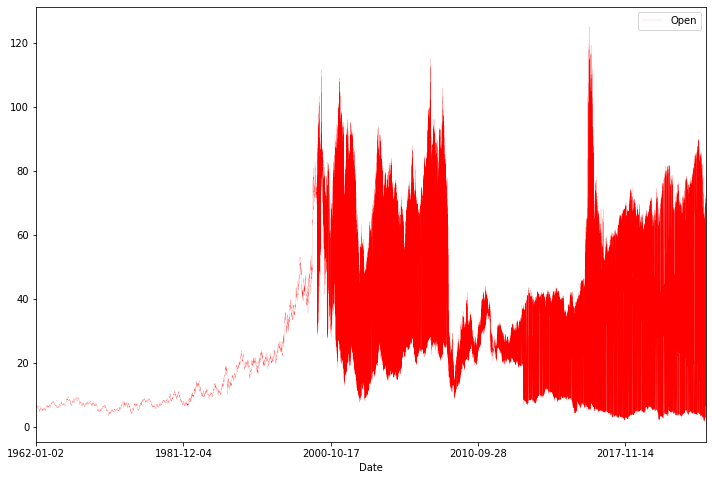

In [10]:
frame[frame['Stock'] == 'A'].sort_values('Date').plot(kind='line',x='Date', y='Open',color='red',figsize=(12,8),linewidth=0.1)

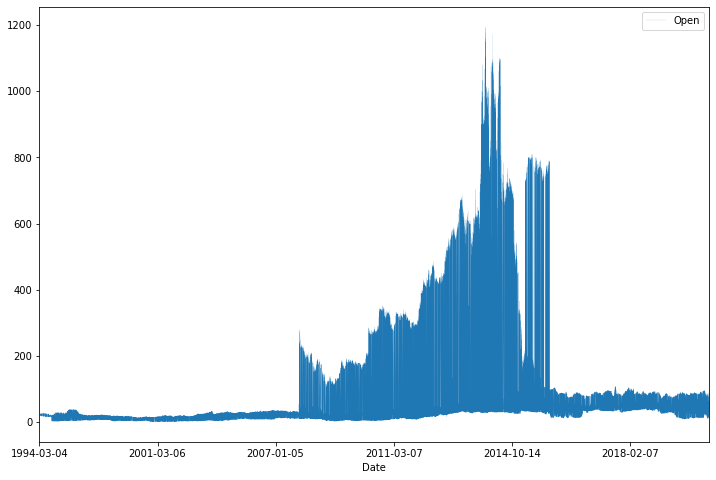

In [11]:
frame[frame['Stock'] == 'C'].sort_values('Date').plot(kind='line',x='Date', y='Open',figsize=(12,8),linewidth=0.1)

In [12]:
frame['Stock'].unique()

array(['A', 'G', 'L', 'C', 'E', 'N', 'I', 'P', 'T', 'U', 'W', 'B', 'V',
       'O', 'M', 'D', 'R', 'X', 'S', 'H', 'Y', 'K', 'F'], dtype=object)

In [13]:
sorted_stocks = frame.sort_values(by=['Stock', 'Date'])

In [14]:
sorted_stocks['dClose'] = (sorted_stocks['Close'].shift(1) - sorted_stocks['Close'].shift(2))/sorted_stocks['Close'].shift(2)*100
sorted_stocks.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose
5124,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900.0,A,NaN
5125,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500.0,A,NaN
5126,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500.0,A,1.532799
5127,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500.0,A,0.000000
5128,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800.0,A,-0.120772
5129,1962-01-09,6.408000,6.508125,6.355935,6.355935,1.495202,64500.0,A,-3.264812
5130,1962-01-10,6.355935,6.408000,6.339915,6.363945,1.497087,34500.0,A,-0.812498
5131,1962-01-11,6.347925,6.347925,6.323895,6.339915,1.491434,27900.0,A,0.126023
5132,1962-01-12,6.339915,6.347925,6.207750,6.207750,1.460343,26500.0,A,-0.377599
5133,1962-01-15,6.139665,6.139665,6.055560,6.055560,1.424540,64500.0,A,-2.084649


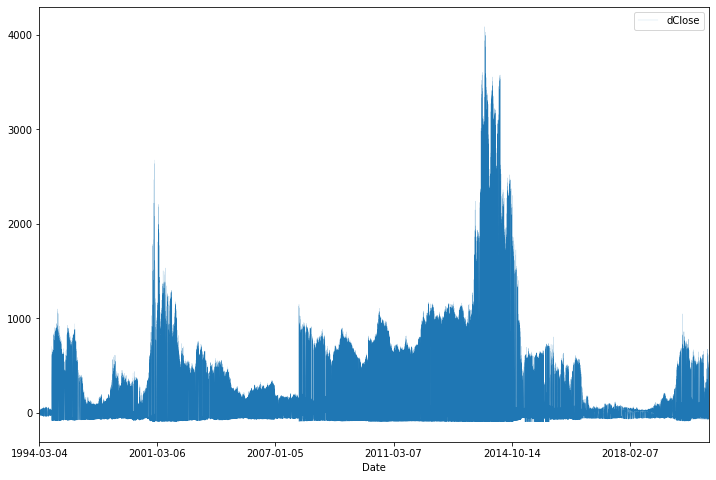

In [15]:
sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(kind='line',x='Date', y='dClose',figsize=(12,8),linewidth=0.1)

In [16]:
"""
Add trend column to dataframe which is the target to be predicted later

'+' indicates an increase of >= 1%
'-' indicates an decrease of <= -1%
'n' indicates an increase or decrease between -1% and 1%
"""

sorted_stocks.loc[((sorted_stocks['Close'] - sorted_stocks['Close'].shift(1))
                   /sorted_stocks['Close'].shift(1)*100 <= -0.5), 'trend'] = '-'
sorted_stocks.loc[((sorted_stocks['Close'] - sorted_stocks['Close'].shift(1))
                   /sorted_stocks['Close'].shift(1)*100 >= 0.5), 'trend'] = '+'
sorted_stocks.loc[(((sorted_stocks['Close'] - sorted_stocks['Close'].shift(1))
                    /sorted_stocks['Close'].shift(1)*100 > -0.5) & 
                  ((sorted_stocks['Close'] - sorted_stocks['Close'].shift(1))
                   /sorted_stocks['Close'].shift(1)*100 < 0.5)), 'trend'] = 'n'

sorted_stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose,trend
5124,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900.0,A,NaN,NaN
5125,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500.0,A,NaN,+
5126,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500.0,A,1.532799,n
5127,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500.0,A,0.000000,n
5128,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800.0,A,-0.120772,-
5129,1962-01-09,6.408000,6.508125,6.355935,6.355935,1.495202,64500.0,A,-3.264812,-
5130,1962-01-10,6.355935,6.408000,6.339915,6.363945,1.497087,34500.0,A,-0.812498,n
5131,1962-01-11,6.347925,6.347925,6.323895,6.339915,1.491434,27900.0,A,0.126023,n
5132,1962-01-12,6.339915,6.347925,6.207750,6.207750,1.460343,26500.0,A,-0.377599,-
5133,1962-01-15,6.139665,6.139665,6.055560,6.055560,1.424540,64500.0,A,-2.084649,-


In [17]:
"""
Extract year, month and weekday as independend columns from date column

year is represented as integer
month is represented as three-digit short code
weekday is represented as three-digit short code
"""

# year
sorted_stocks['year'] = pd.DatetimeIndex(sorted_stocks['Date']).year

# month
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 1, 'month'] = 'jan'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 2, 'month'] = 'feb'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 3, 'month'] = 'mar'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 4, 'month'] = 'apr'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 5, 'month'] = 'may'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 6, 'month'] = 'jun'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 7, 'month'] = 'jul'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 8, 'month'] = 'aug'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 9, 'month'] = 'sep'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 10, 'month'] = 'oct'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 11, 'month'] = 'nov'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).month == 12, 'month'] = 'dec'

# weekday
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 0, 'weekday'] = 'mon'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 1, 'weekday'] = 'tue'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 2, 'weekday'] = 'wed'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 3, 'weekday'] = 'thu'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 4, 'weekday'] = 'fri'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 5, 'weekday'] = 'sat'
sorted_stocks.loc[pd.DatetimeIndex(sorted_stocks['Date']).weekday == 6, 'weekday'] = 'sun'

#sorted_stocks.count()
sorted_stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose,trend,year,month,weekday
5124,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900.0,A,NaN,NaN,1962,jan,tue
5125,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500.0,A,NaN,+,1962,jan,wed
5126,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500.0,A,1.532799,n,1962,jan,thu
5127,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500.0,A,0.000000,n,1962,jan,fri
5128,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800.0,A,-0.120772,-,1962,jan,mon
5129,1962-01-09,6.408000,6.508125,6.355935,6.355935,1.495202,64500.0,A,-3.264812,-,1962,jan,tue
5130,1962-01-10,6.355935,6.408000,6.339915,6.363945,1.497087,34500.0,A,-0.812498,n,1962,jan,wed
5131,1962-01-11,6.347925,6.347925,6.323895,6.339915,1.491434,27900.0,A,0.126023,n,1962,jan,thu
5132,1962-01-12,6.339915,6.347925,6.207750,6.207750,1.460343,26500.0,A,-0.377599,-,1962,jan,fri
5133,1962-01-15,6.139665,6.139665,6.055560,6.055560,1.424540,64500.0,A,-2.084649,-,1962,jan,mon


In [33]:
"""
Extract google Trends information for search term 'financial crisis' and map it to the stock data
"""

df_financial_crisis = pd.read_csv('../../trend_data/financial_crisis.csv')

# year
df_financial_crisis['year'] = pd.DatetimeIndex(df_financial_crisis['Monat']).year

# month
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 1, 'month'] = 'jan'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 2, 'month'] = 'feb'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 3, 'month'] = 'mar'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 4, 'month'] = 'apr'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 5, 'month'] = 'may'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 6, 'month'] = 'jun'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 7, 'month'] = 'jul'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 8, 'month'] = 'aug'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 9, 'month'] = 'sep'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 10, 'month'] = 'oct'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 11, 'month'] = 'nov'
df_financial_crisis.loc[pd.DatetimeIndex(df_financial_crisis['Monat']).month == 12, 'month'] = 'dec'

stocks_trend_joined = pd.merge(left=sorted_stocks, 
                               right=df_financial_crisis, 
                               left_on=['year', 'month'], 
                               right_on=['year', 'month'])[
    ['Date', 
     'Open', 
     'High', 
     'Low', 
     'Close', 
     'Adj Close', 
     'Volume', 
     'Stock', 
     'dClose', 
     'trend', 
     'year', 
     'month', 
     'weekday', 
     'trends_financial_crisis']]
#stocks_trend_joined

#stocks_trend_joined.count()
stocks_trend_joined.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose,trend,year,month,weekday,trends_financial_crisis
0,2004-01-02,20.922747,20.951359,20.586552,20.600859,17.717672,2839400.0,A,336.583358,-,2004,jan,fri,5
1,2004-01-02,91.314003,92.419380,89.752052,90.232651,72.434738,2150500.0,A,-77.439540,+,2004,jan,fri,5
2,2004-01-05,21.101574,21.144491,20.894135,21.137339,18.179064,5234500.0,A,338.004319,-,2004,jan,mon,5
3,2004-01-05,91.073700,93.428642,90.713249,93.188339,74.807442,3510700.0,A,-76.574623,+,2004,jan,mon,5
4,2004-01-06,21.137339,21.816881,21.080114,21.802574,18.751205,4921000.0,A,340.870730,-,2004,jan,tue,5
5,2004-01-06,93.476700,94.774323,91.578331,92.491470,74.248016,2672100.0,A,-76.603753,+,2004,jan,tue,5
6,2004-01-07,21.816881,22.081545,21.673820,22.081545,18.991135,4231600.0,A,324.222707,-,2004,jan,wed,5
7,2004-01-07,91.794601,92.082962,90.713249,91.794601,73.688583,2893700.0,A,-76.125858,+,2004,jan,wed,5
8,2004-01-08,22.095852,23.118742,22.052933,23.090128,19.858555,7320400.0,A,315.707334,-,2004,jan,thu,5
9,2004-01-08,93.717003,94.197601,92.034897,92.899979,74.575981,3231000.0,A,-74.845876,+,2004,jan,thu,5


In [47]:
"""
Extract meta information information for stocks and map it to the stock data
"""

df_stock_metadata = pd.read_csv('../../archive/symbols_valid_meta.csv')

stocks_metadata_joined = pd.merge(left=stocks_trend_joined, 
                               right=df_stock_metadata, 
                               left_on=['Stock'], 
                               right_on=['Symbol'])[
    ['Date', 
     'Open', 
     'High', 
     'Low', 
     'Close', 
     'Adj Close', 
     'Volume', 
     'Stock', 
     'dClose', 
     'trend', 
     'year', 
     'month', 
     'weekday', 
     'trends_financial_crisis',
     'Security Name',
     'Listing Exchange',
     'Market Category',
     'Nasdaq Traded',
     'ETF',
     'Round Lot Size',
     'Financial Status',
     'CQS Symbol',
     'NASDAQ Symbol',
     'NextShares']]

stocks_metadata_joined.head(10)
#stocks_metadata_joined.count()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose,trend,...,Security Name,Listing Exchange,Market Category,Nasdaq Traded,ETF,Round Lot Size,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,2004-01-02,20.922747,20.951359,20.586552,20.600859,17.717672,2839400.0,A,336.583358,-,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
1,2004-01-02,91.314003,92.419380,89.752052,90.232651,72.434738,2150500.0,A,-77.439540,+,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
2,2004-01-05,21.101574,21.144491,20.894135,21.137339,18.179064,5234500.0,A,338.004319,-,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
3,2004-01-05,91.073700,93.428642,90.713249,93.188339,74.807442,3510700.0,A,-76.574623,+,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
4,2004-01-06,21.137339,21.816881,21.080114,21.802574,18.751205,4921000.0,A,340.870730,-,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
5,2004-01-06,93.476700,94.774323,91.578331,92.491470,74.248016,2672100.0,A,-76.603753,+,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
6,2004-01-07,21.816881,22.081545,21.673820,22.081545,18.991135,4231600.0,A,324.222707,-,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
7,2004-01-07,91.794601,92.082962,90.713249,91.794601,73.688583,2893700.0,A,-76.125858,+,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
8,2004-01-08,22.095852,23.118742,22.052933,23.090128,19.858555,7320400.0,A,315.707334,-,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N
9,2004-01-08,93.717003,94.197601,92.034897,92.899979,74.575981,3231000.0,A,-74.845876,+,...,"Agilent Technologies, Inc. Common Stock",N,,Y,N,100.0,NaN,A,A,N


In [59]:
"""
Check for NaN values in dataframe
"""

nan_dict = {}

nan_dict.update({'Date': stocks_metadata_joined['Date'].isnull().sum()})
nan_dict.update({'Open': stocks_metadata_joined['Open'].isnull().sum()})
nan_dict.update({'High': stocks_metadata_joined['High'].isnull().sum()})
nan_dict.update({'Low': stocks_metadata_joined['Low'].isnull().sum()})
nan_dict.update({'Close': stocks_metadata_joined['Close'].isnull().sum()})
nan_dict.update({'Adj Close': stocks_metadata_joined['Adj Close'].isnull().sum()})
nan_dict.update({'Volume': stocks_metadata_joined['Volume'].isnull().sum()})
nan_dict.update({'Stock': stocks_metadata_joined['Stock'].isnull().sum()})
nan_dict.update({'dClose': stocks_metadata_joined['dClose'].isnull().sum()})
nan_dict.update({'trend': stocks_metadata_joined['trend'].isnull().sum()})
nan_dict.update({'Security Name': stocks_metadata_joined['Security Name'].isnull().sum()})
nan_dict.update({'Listing Exchange': stocks_metadata_joined['Listing Exchange'].isnull().sum()})
nan_dict.update({'Market Category': stocks_metadata_joined['Market Category'].isnull().sum()})
nan_dict.update({'Nasdaq Traded': stocks_metadata_joined['Nasdaq Traded'].isnull().sum()})
nan_dict.update({'Open': stocks_metadata_joined['Open'].isnull().sum()})

nan_dict

{'Date': 0,
 'Open': 0,
 'High': 0,
 'Low': 0,
 'Close': 0,
 'Adj Close': 0,
 'Volume': 0,
 'Stock': 0,
 'dClose': 0,
 'trend': 0,
 'Security Name': 0,
 'Listing Exchange': 0,
 'Market Category': 0,
 'Nasdaq Traded': 0}

In [46]:
stocks_metadata_joined[['Stock', 
               'dClose', 
               'year', 
               'month', 
               'weekday',  
               'trends_financial_crisis',
               'Security Name',
               'trend']].apply(lambda x : 
                               pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Stock,dClose,year,month,weekday,trends_financial_crisis,Security Name,trend
Stock,1.000000,0.964948,0.066542,0.000974,-0.000277,0.013072,1.000000,0.064721
dClose,0.964948,1.000000,0.132614,0.002372,0.000101,0.030907,0.964948,0.049576
year,0.066542,0.132614,1.000000,-0.046526,-0.002528,0.242902,0.066542,-0.022221
month,0.000974,0.002372,-0.046526,1.000000,-0.019206,-0.017907,0.000974,0.003117
weekday,-0.000277,0.000101,-0.002528,-0.019206,1.000000,0.005255,-0.000277,0.001986
trends_financial_crisis,0.013072,0.030907,0.242902,-0.017907,0.005255,1.000000,0.013072,-0.013799
Security Name,1.000000,0.964948,0.066542,0.000974,-0.000277,0.013072,1.000000,0.064721
trend,0.064721,0.049576,-0.022221,0.003117,0.001986,-0.013799,0.064721,1.000000
